In [1]:
import os
from google.colab import drive
drive.mount("/content/gdrive")
!ls


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive
gdrive	sample_data


In [0]:
#!ls
os.chdir("gdrive/My Drive/grss_dataset")
#!unzip pressure_gauge.zip

In [0]:

#os.chdir("My Drive")
!ls
!tar -xvf image_gesture.tgz

In [0]:

from PIL import Image
import os, sys

path = "train/"
dirs = os.listdir( path )

def resize(path1):
  dirs = os.listdir( path1 )
  #print(dirs)
  for item in dirs:
    print(path1+item)
    if os.path.isfile(path1+item):
      im = Image.open(path1+item)
     # print(path1)
      f, e = os.path.splitext(path1+item)
      imResize = im.resize((128,128), Image.ANTIALIAS)
      imResize.save(f + '.jpg', 'JPG', quality=90)

resize("train/fire")
resize("train/forest")
resize("train/smoke")

resize("test/fire")
resize("test/forest")
resize("test/smoke")              

In [0]:
!ls
#os.chdir("images")

sample_data


In [0]:
#os.chdir("images")
#os.chdir("images")
os.chdir("..")

In [0]:
!ls
#os.chdir("grss_hsv_thres")#
#!rm test_fire.jpeg


test1  train1


In [3]:
import keras
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, Activation, Conv2D, MaxPooling2D, Flatten

from keras.preprocessing.image import ImageDataGenerator

image_height=128
image_width=128
input_size=3
no_classes=2
batch_sz=32
image_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

train_generator = image_datagen.flow_from_directory(
    'train1',
    target_size=(image_height,image_width),
    batch_size=batch_sz,
    color_mode="rgb",
    classes=['fire','smoke'],
    class_mode='categorical')

test_generator = image_datagen.flow_from_directory(
    'test1',
    target_size=(image_height,image_width),
    batch_size=batch_sz,
    color_mode="rgb",
    classes=['fire','smoke'],
    class_mode='categorical')


model = Sequential()
model.add(Conv2D(32, (3,3), strides=(1, 1),
                 activation='relu',
                 input_shape = (image_height,image_width,input_size)))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
#new updates
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())

model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=32, activation='relu'))

model.add(Dense(units=no_classes, activation='softmax'))
#model.summary()

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.SGD(lr=0.01),
              metrics=['accuracy'])
model.summary()
model.fit_generator(train_generator, steps_per_epoch =32 , epochs=10, validation_data = test_generator, nb_val_samples=10)
#steps_per_epoch =1810//batch_sz 
#model.predict(test_generator)





Using TensorFlow backend.


Found 0 images belonging to 2 classes.
Found 0 images belonging to 2 classes.






Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 126, 126, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 61, 61, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 32)        0         
____________________________________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:56: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:56: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., steps_per_epoch=32, epochs=10, validation_data=<keras_pre..., validation_steps=10)`



Epoch 1/10


KeyboardInterrupt: ignored

In [0]:
import cv2
from keras.utils import plot_model
plot_model(model, to_file='model.jpg',expand_nested=True,show_shapes=True,show_layer_names=True)
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img=cv2.imread('model.jpg')
imgplot = plt.imshow(img)
plt.show()
#model.save("new_model.h5")
#from google.colab import files
#uploaded = files.download("new_model.h5")

TypeError: ignored

In [0]:
#!ls
#os.chdir("../grss_dataset/train/fire")
from IPython.display import SVG
from keras.utils import model_to_dot

SVG(model_to_dot(model).create(prog='dot', format='svg'))

ImportError: ignored

In [0]:
#FIRE----------------------------------------------------
import cv2

#better thresholding necessary for few colors , colors like yellow are creeping up into the picture

def thres(img,img1,h,s,v):
    val=img.shape
    new=img1
    h1=s1=v1=n=0
    for i in range(val[0]):
        for j in range(val[1]):
            if(0<=img[i][j][0]<=h and img[i][j][1]>=s and img[i][j][2]>=v):
                h1+=img[i][j][0]
                s1+=img[i][j][1]
                v1+=img[i][j][2]
                n+=1
            
            #if(0<=img[i][j][0]<=limit):
           #     print(img[i][j][0],end=',')
            #    print(img[i][j][1],end=',')
             #   print(img[i][j][2])
            else:
                new[i][j][0]=new[i][j][1]=new[i][j][2]=0
  #  print(h1/n,end=',')
  #  print(s1/n,end=',')
  #  print(v1/n)
    return new
#best hsv so is h=60 s>=200 but lot of work and research is required in isolating v values , hue is the angle of rotation on color scale , saturation is the depth of the color, intensity is the white present in the color , this is my interpretaion so far. 

def fire_segment(filename,h,s,v,g):
    img =  cv2.imread(filename)
    hsv = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)     
    new_img=thres(hsv,img,h,s,v)
    edges=new_img
    return new_img
    if(g==1):
        gray = cv2.cvtColor(new_img,cv2.COLOR_BGR2GRAY)
        edges = cv2.Canny(gray,100,200)
       # ret_val, gray = cv2.threshold(gray, 100, 255, cv2.THRESH_BINARY)
       # new_img=gray[0:300,0:300]
       # cv2.rectangle(img,(0,0),(300,300),(255,0,0),2)
       # upgray=load_opencv(new_img)
       # npimg=model.predict(upgray)
       # print(npimg.max())
       # max(npimg)

#best values so far 60 25 200 h s v



In [0]:
#SMOKE-----------------------------------------------------------
#print 'Number of arguments:', len(sys.argv), 'arguments.'


#better thresholding necessary for few colors , colors like yellow are creeping up into the picture

def thres_smoke(img,img1,hl,hh,sl,sh,vl,vh,vll,vlh):
    val=img.shape
    new=img1
    h1=s1=v1=n=0
    for i in range(val[0]):
        for j in range(val[1]):
            if((vh>=img[i][j][2]>=vl or vll<=img[i][j][2]<=vlh) and hl<=img[i][j][0]<=hh and sh>=img[i][j][1]>=sl ):
                h1+=img[i][j][0]
                s1+=img[i][j][1]
                v1+=img[i][j][2]
                n+=1
            
            #if(0<=img[i][j][0]<=limit):
           #     print(img[i][j][0],end=',')
            #    print(img[i][j][1],end=',')
             #   print(img[i][j][2])
            else:
                new[i][j][0]=new[i][j][1]=new[i][j][2]=0
  #  print(h1/n,end=',')
  #  print(s1/n,end=',')
  #  print(v1/n)
    return new
#best hsv so is h=60 s>=200 but lot of work and research is required in isolating v values , hue is the angle of rotation on color scale , saturation is the depth of the color, intensity is the white present in the color , this is my interpretaion so far. 

def smoke_segment(filename,hl,hh,sl,sh,vl,vh,vll,vlh,g):
    img = cv2.imread(filename)
    hsv = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)     
    new_img=thres_smoke(hsv,img,hl,hh,sl,sh,vl,vh,vll,vlh)
    edges=new_img
    if(g==1):
        gray = cv2.cvtColor(new_img,cv2.COLOR_BGR2GRAY)
        edges = cv2.Canny(gray,100,200)
       # ret_val, gray = cv2.threshold(gray, 100, 255, cv2.THRESH_BINARY)
       # new_img=gray[0:300,0:300]
       # cv2.rectangle(img,(0,0),(300,300),(255,0,0),2)
       # upgray=load_opencv(new_img)
       # npimg=model.predict(upgray)
       # print(npimg.max())
       # max(npimg)
    kernel = np.ones((3,3),np.uint8)
    oedges = cv2.morphologyEx(edges, cv2.MORPH_OPEN, kernel)
    #cedges = cv2.morphologyEx(edges, cv2.MORPH_CLOSE, kernel)
    #-------------------------------------------------------
   # nedges = cv2.morphologyEx(edges, cv2.MORPH_CLOSE, kernel)
   # nedges = cv2.morphologyEx(nedges, cv2.MORPH_OPEN, kernel)
    return oedges
   #best values so far 0-255 0-40 150-225 0-60 h s v vl


In [0]:
def thres_updated(img,img1,hl,hh,sl,sh,vl,vh,vll,vlh,fh,fs,fv):
    val=img.shape
    new=img1
    h1=s1=v1=n=0
    for i in range(val[0]):
        for j in range(val[1]):
            if((vh>=img[i][j][2]>=vl or vll<=img[i][j][2]<=vlh) and hl<=img[i][j][0]<=hh and sh>=img[i][j][1]>=sl ):
                h1+=img[i][j][0]
                s1+=img[i][j][1]
                v1+=img[i][j][2]
                n+=1
            elif(0<=img[i][j][0]<=fh and img[i][j][1]>=fs and img[i][j][2]>=fv):
                h1+=img[i][j][0]
                s1+=img[i][j][1]
                v1+=img[i][j][2]
                n+=1
            
            #if(0<=img[i][j][0]<=limit):
           #     print(img[i][j][0],end=',')
            #    print(img[i][j][1],end=',')
             #   print(img[i][j][2])
            else:
                new[i][j][0]=new[i][j][1]=new[i][j][2]=0
  #  print(h1/n,end=',')
  #  print(s1/n,end=',')
  #  print(v1/n)
    return new
def updated_segment(filename,hl,hh,sl,sh,vl,vh,vll,vlh,fh,fs,fv,g):
    img = cv2.imread(filename)
    hsv = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)     
    new_img=thres_updated(hsv,img,hl,hh,sl,sh,vl,vh,vll,vlh,fh,fs,fv)
    edges=new_img
    if(g==1):
        gray = cv2.cvtColor(new_img,cv2.COLOR_BGR2GRAY)
        edges = cv2.Canny(gray,100,200)
       # ret_val, gray = cv2.threshold(gray, 100, 255, cv2.THRESH_BINARY)
       # new_img=gray[0:300,0:300]
       # cv2.rectangle(img,(0,0),(300,300),(255,0,0),2)
       # upgray=load_opencv(new_img)
       # npimg=model.predict(upgray)
       # print(npimg.max())
       # max(npimg)
    kernel = np.ones((3,3),np.uint8)
    oedges = cv2.morphologyEx(edges, cv2.MORPH_OPEN, kernel)
    #cedges = cv2.morphologyEx(edges, cv2.MORPH_CLOSE, kernel)
    #-------------------------------------------------------
   # nedges = cv2.morphologyEx(edges, cv2.MORPH_CLOSE, kernel)
   # nedges = cv2.morphologyEx(nedges, cv2.MORPH_OPEN, kernel)
    return oedges
   #best values so far 0-255 0-40 150-225 0-60 h s v vl
def great(arr):
  n=np.max(arr)
  if(n==arr[0]):
    print('fire')
  if(n==arr[0]):
    print('smoke')
  if(n==arr[0]):
    print('forest')

In [0]:

#os.chdir('train1/smoke')
!ls

 00105f23_500.jpg
 010d45da5d433089f6bb62aa1b7e9ec1.jpg
 0.18465500_1436391592_forest_fire_large.jpg
 0232ABE7_571B_47EB_83C87C83BBCC07DD_source.jpg
 03fire_ukd1.jpg
 0.45584200_1539171709_forest_fire__gettyimages.jpg
 0.47468500_1547725681_23.jpg
 05_22_2013_forest_fire.jpg
 05BGTURAHALLI.jpg
 101580102_aerial_view_forest_fire_on_the_slopes_of_hills_and_mountains_forest_and_tropical_jungle_deforestatio.jpg
 101743644_aerial_view_forest_fire_on_the_slopes_of_hills_and_mountains_forest_and_tropical_jungle_deforestatio.jpg
 105387716_1533836290065gettyimages_1008050668.530x298.jpeg
 107202_yodpvhfpsb_1543856078.jpg
'1 (1).jpg'
 11Portugal1_articleLarge.jpg
 1200_271541_what_causes_forest_fires.jpg
 1200px_Bugaboo_forest_fire.jpg
 12146.jpg
 1250_forest_fire_heart_attack_1296x728_header.jpg
 1280x720_80504B00_BMHLL1.jpg
 1280x720_80725P00_TOLVU.jpg
 12BGFORESTFIRE2.jpg
 12.jpg
 130612094648_06_co_fire_0612_horizontal_large_gallery.jpg
 1342d936cea42df5c34d1245c7d384e218740b62f430731f92b0c

In [0]:
from google.colab import files
  uploaded = files.upload()

Saving test_fire.jpeg to test_fire.jpeg


In [0]:
#os.chdir('../grss_dataset/train/forest')
#!ls
os.chdir("../fire")
!ls

 00105f23_500.jpg
 010d45da5d433089f6bb62aa1b7e9ec1.jpg
 0.18465500_1436391592_forest_fire_large.jpg
 0232ABE7_571B_47EB_83C87C83BBCC07DD_source.jpg
 03fire_ukd1.jpg
 0.45584200_1539171709_forest_fire__gettyimages.jpg
 0.47468500_1547725681_23.jpg
 05_22_2013_forest_fire.jpg
 05BGTURAHALLI.jpg
 101580102_aerial_view_forest_fire_on_the_slopes_of_hills_and_mountains_forest_and_tropical_jungle_deforestatio.jpg
 101743644_aerial_view_forest_fire_on_the_slopes_of_hills_and_mountains_forest_and_tropical_jungle_deforestatio.jpg
 105387716_1533836290065gettyimages_1008050668.530x298.jpeg
 107202_yodpvhfpsb_1543856078.jpg
'1 (1).jpg'
 11Portugal1_articleLarge.jpg
 1200_271541_what_causes_forest_fires.jpg
 1200px_Bugaboo_forest_fire.jpg
 12146.jpg
 1250_forest_fire_heart_attack_1296x728_header.jpg
 1280x720_80504B00_BMHLL1.jpg
 1280x720_80725P00_TOLVU.jpg
 12BGFORESTFIRE2.jpg
 12.jpg
 130612094648_06_co_fire_0612_horizontal_large_gallery.jpg
 1342d936cea42df5c34d1245c7d384e218740b62f430731f92b0c

updated-------------------------- 0 [[0.9951202  0.00487974]]
fire-------------------------- 0 [[0.9954808  0.00451919]] smoke-------------------------- [[0.9961182  0.00388178]] 0


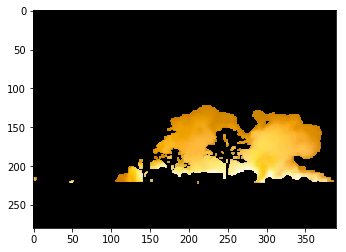

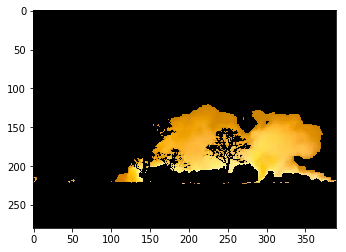

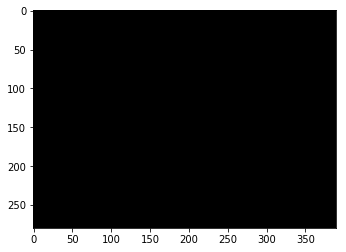

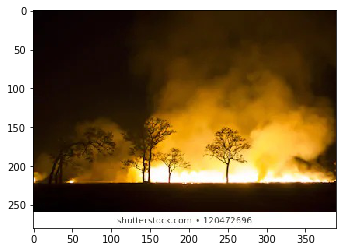

In [0]:
 

import cv2
import os
from PIL import Image
import numpy as np
from skimage import transform
import os, sys
#os.chdir("FIVE")
import numpy as np

from keras.preprocessing.image import img_to_array, load_img

# this is a PIL image
def load(filename):
  np_image = filename#Image.open(filename)
  np_image = np.array(np_image).astype('float32')/255
  np_image = transform.resize(np_image, (128, 128,3))
  np_image = np.expand_dims(np_image, axis=0)
  return np_image

fname= 'Wildfire _ Burning forest ecosystem is destroyed (1).jpg'



new=fire_segment(fname,60,100,200,0)
new_smoke=smoke_segment(fname,0,180,0,80,100,225,0,20,0)
new=cv2.cvtColor(new, cv2.COLOR_BGR2RGB)
new_smoke=cv2.cvtColor(new_smoke, cv2.COLOR_BGR2RGB)
image = load(new)
smoke_image=load(new_smoke)
new_img=updated_segment(fname,0,180,0,80,100,225,0,20,60,25,200,0)
new_img=cv2.cvtColor(new_img, cv2.COLOR_BGR2RGB)
print("updated--------------------------",end=' ')
updated_val=model.predict(load(new_img))
print(np.argmax(updated_val),end=' ')
print(updated_val)
print("fire--------------------------",end=' ')
fire_val=model.predict(image)
print(np.argmax(fire_val),end=' ')
print(fire_val,end=' ')
print("smoke--------------------------",end=' ')
smoke_val=model.predict(smoke_image)
print(smoke_val,end=' ')
print(np.argmax(smoke_val))
imgtest=cv2.imread(fname)
imgtest=cv2.cvtColor(imgtest, cv2.COLOR_BGR2RGB)
#img2_fg = cv2.bitwise_xor(new,imgtest)
diff=cv2.subtract(imgtest,new)
//////////////////
import matplotlib.pyplot as plt
#import matplotlib.image as mpimg
imgplot = plt.imshow(new_img)
plt.show()
////////////////////


plt.imshow(new)
plt.show()
plt.imshow(new_smoke)
plt.show()
img=mpimg.imread(fname)
plt.imshow(img)
plt.show()

In [0]:
model.save("grss_latest.h5")
!ls

In [0]:
from google.colab import files
files.download("latest_model.h5")